In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
# Load cleaned data
data = pd.read_csv("../../data/processed/data_processed_tree.csv")

# Split data into features (X) and target (y)
X = data.drop("Status", axis=1)
y = data["Status"]

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create a random forest classifier with 100 trees
clf = RandomForestClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    "n_estimators": [175, 200, 225],
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(
    estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, scoring="accuracy"
)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'n_estimators': 200}
Best Score: 0.9156426676497418


Accuracy using best estimator: 0.92
              precision    recall  f1-score   support

           0       0.95      0.90      0.92     33406
           1       0.90      0.95      0.92     33225

    accuracy                           0.92     66631
   macro avg       0.92      0.92      0.92     66631
weighted avg       0.92      0.92      0.92     66631



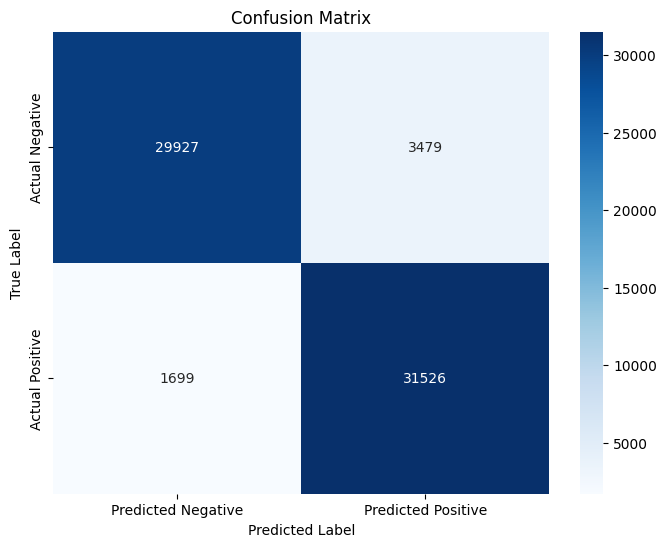

In [6]:
best_clf = grid_search.best_estimator_
accuracy = best_clf.score(X_test, y_test)
print(f"Accuracy using best estimator: {accuracy:.2f}")

# Classification report using the best estimator
y_pred = best_clf.predict(X_test)
print(classification_report(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix using the best estimator
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    cmap="Blues",
    fmt="d",
    xticklabels=["Predicted Negative", "Predicted Positive"],
    yticklabels=["Actual Negative", "Actual Positive"],
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()